### Metrics Agg: Compare & Analyze `EvalMetrics`


In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt

### Load & Setup

In [2]:
!ls assets/metrics-dfs

metrics1-df-net3.csv   metrics3-df-resnet.csv	      metrics5-featsnet2x.csv
metrics2-df-lasso.csv  metrics4-perfectml-feats2.csv  metrics6-fasttab-1x.csv
metrics2-df-rf.csv     metrics4-rflasso.csv	      rcn6b-featsnet1x.csv


In [3]:
d = 'assets/metrics-dfs/'
fns = [fn for fn in os.listdir(d) if 'csv' in fn]
dfs = [pd.read_csv(d + fn) for fn in fns]
df  = pd.concat(dfs, join='inner')

cols = ['model', 'details', 'target', 'split', 'mse', 'mae', 'r2', 'dist_avg', 'dist_r2', 'sqdist_avg', 'sqdist_r2']
assert all([col in df.columns for col in cols])

In [4]:
# d = 'assets/metrics-dfs/'
# net3 =   pd.read_csv(d + 'metrics1-df-net3.csv')
# lasso =  pd.read_csv(d + 'metrics2-df-lasso.csv')
# rf =     pd.read_csv(d + 'metrics2-df-rf.csv')
# resnet = pd.read_csv(d + 'metrics3-df-resnet.csv')
# df = pd.concat((net3, lasso, rf, resnet), join='inner')

In [5]:
df.head(2)

,model,details,target,split,mse,mae,r2,dist_avg,dist_r2,sqdist_avg,sqdist_r2
0,Net3,10 fit epochs,center,valid,0.002321,0.035860,0.529265,0.057386,0.430105,0.004642,0.625702
1,Net3,10 fit epochs,center,train,0.001251,0.026886,0.780596,0.042757,0.590545,0.002502,0.810111


### Relevant Splits

In [6]:
tmp = df[(df['split'] == 'valid') & (df['target'] == 'topleft')]
tmp = tmp.sort_values(by='dist_r2', ascending=False)
tmp[['model', 'mse', 'r2', 'dist_avg', 'dist_r2']].round(3)

,model,mse,r2,dist_avg,dist_r2
6,LR Feats2,0.000,1.000,0.000,1.000
14,RF Feats2,0.000,1.000,0.001,0.997
2,RF Feats,0.000,1.000,0.001,0.996
10,Ridge Feats2,0.000,0.998,0.011,0.960
0,fastai.Tabular 1.1,0.000,0.996,0.015,0.930
0,FeatsNet2.1122,0.001,0.964,0.030,0.863
2,RF,0.010,0.835,0.085,0.707
6,Lasso Feats,0.018,0.692,0.130,0.550
2,Lasso,0.018,0.692,0.130,0.550
4,FeatsNet1.22,0.014,0.569,0.131,0.394


In [19]:
tmp = df[(df['split'] == 'valid') & (df['target'] == 'center')]
tmp = tmp.sort_values(by='dist_r2', ascending=False)
tmp[['model', 'mse', 'r2', 'dist_avg', 'dist_r2']].round(3)

,model,mse,r2,dist_avg,dist_r2
15,RF Feats2,0.000,0.989,0.008,0.942
7,LR Feats2,0.000,0.990,0.010,0.928
3,RF Feats,0.000,0.977,0.014,0.900
11,Ridge Feats2,0.000,0.982,0.018,0.878
3,RF,0.002,0.871,0.042,0.708
3,Lasso,0.002,0.842,0.053,0.629
7,Lasso Feats,0.002,0.842,0.053,0.629
14,FeatsNet1.12,0.001,0.701,0.044,0.562
16,FeatsNet1.22,0.002,0.682,0.046,0.546
12,FeatsNet1.11,0.002,0.658,0.047,0.537


### The Whole Thing

In [23]:
pd.set_option('display.max_rows', None)
df.round(4)

,model,details,target,split,mse,mae,r2,dist_avg,dist_r2,sqdist_avg,sqdist_r2
0,Net3,10 fit epochs,center,valid,0.0023,0.0359,0.5293,0.0574,0.4301,0.0046,0.6257
1,Net3,10 fit epochs,center,train,0.0013,0.0269,0.7806,0.0428,0.5905,0.0025,0.8101
2,Net3,10 fit epochs,topleft,valid,0.0206,0.1033,0.1702,0.1669,0.2275,0.0412,0.3557
3,Net3,10 fit epochs,topleft,train,0.0141,0.0870,0.3882,0.1388,0.4098,0.0282,0.6284
0,Lasso,alpha=1,topleft,train,0.0053,0.0469,0.9093,0.0745,0.7502,0.0105,0.9108
1,Lasso,alpha=1,center,train,0.0010,0.0234,0.9204,0.0375,0.7401,0.0020,0.9203
2,Lasso,alpha=1,topleft,valid,0.0177,0.0820,0.6924,0.1305,0.5498,0.0353,0.6917
3,Lasso,alpha=1,center,valid,0.0020,0.0336,0.8421,0.0533,0.6292,0.0040,0.8424
0,RF,default params,topleft,train,0.0016,0.0183,0.9726,0.0304,0.8980,0.0032,0.9731
1,RF,default params,center,train,0.0002,0.0091,0.9832,0.0150,0.8958,0.0004,0.9831


### Analyze Correlation b/w Metrics

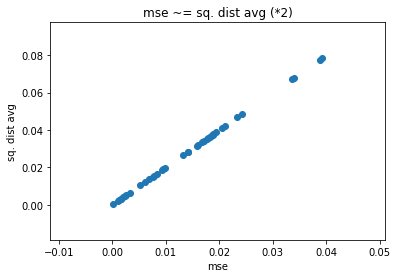

In [17]:
plt.scatter(df['mse'], df['sqdist_avg'])
plt.xlabel('mse'); plt.ylabel('sq. dist avg');
plt.title('mse ~= sq. dist avg (*2)')
xlim, ylim = plt.xlim(), plt.ylim()

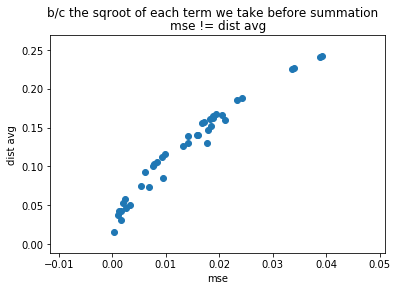

In [18]:
plt.scatter(df['mse'], df['dist_avg'])
xlim, ylim = plt.xlim(), plt.ylim()
plt.xlabel('mse'); plt.ylabel('dist avg');
plt.title('mse != dist avg')
plt.suptitle('b/c the sqroot of each term we take before summation');

#### Compare R2 to MSE
Clearly somthing is wrong, it should be proportional

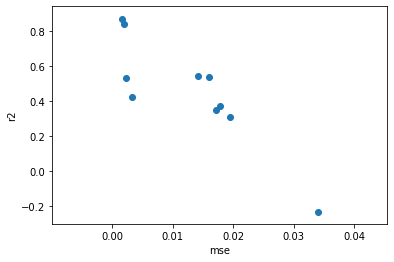

In [19]:
plt.scatter(tmp['mse'], tmp['r2'])
plt.xlabel('mse'); plt.ylabel('r2');

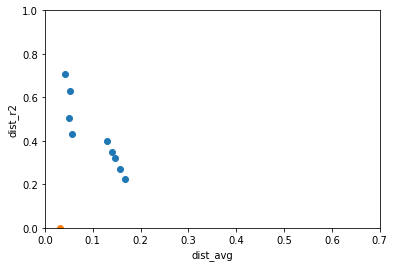

In [23]:
plt.scatter(tmp['dist_avg'], tmp['dist_r2'])
plt.scatter([0.032], [0])
plt.xlabel('dist_avg'); plt.ylabel('dist_r2');
plt.ylim(0,1)
plt.xlim(0, 0.7);

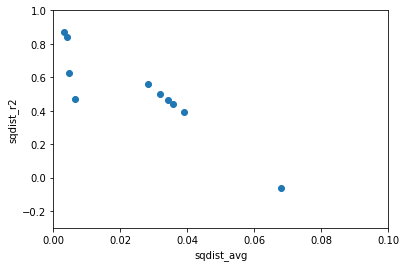

In [22]:
plt.scatter(tmp['sqdist_avg'], tmp['sqdist_r2'])
plt.xlabel('sqdist_avg'); plt.ylabel('sqdist_r2');
plt.ylim(-.3,1)
plt.xlim(0, 0.1);